#Problem statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in 
demand hence making them costly and some are not in demand hence cheaper. One of our clients works with 
small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems 
with their previous car price valuation machine learning models. So, they are looking for new machine learning 
models from new data. 

#Objective

We are going to make carprice valuation model.

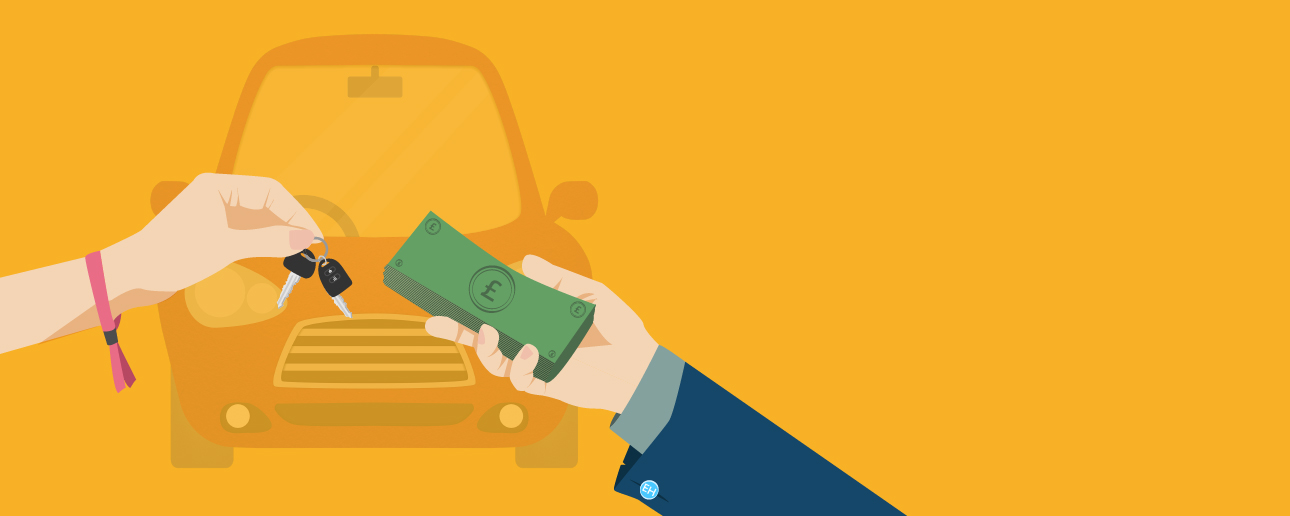

# 1.Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import spacy
import sklearn
import random
import operator
import math
import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving usedcars_webscraping.xlsx to usedcars_webscraping (1).xlsx


In [390]:
import io
df = pd.read_excel(io.BytesIO(uploaded['usedcars_webscraping.xlsx']))
df

,Unnamed: 0,Brand,Model,Year,Kilometers,Fuel,No.of.owners,Location,Price
0,0,Nissan,Sunny,2017.0,86000.0,Diesel,1st,KOCHI,399999.0
1,1,Maruti Suzuki,Baleno,2018.0,51300.0,CNG & Hybrids,1st,RAJKOT,651000.0
2,2,NaN,NaN,NaN,NaN,NaN,NaN,DELHI,618000.0
3,3,Mahindra,Bolero Power Plus,2019.0,28400.0,Diesel,1st,BAREILLY,665000.0
4,4,Honda,Brio,2011.0,48000.0,Petrol,1st,DELHI,235000.0
...,...,...,...,...,...,...,...,...,...
11417,9601,Audi,Q3,2017.0,44600.0,Petrol,1st,Gurgaon,2400000.0
11418,9602,Audi,A3,2017.0,34000.0,Diesel,1st,Gurgaon,2200000.0
11419,9603,Mercedes-Benz,E-Class Cabriolet,2016.0,33100.0,Petrol,2nd,Delhi,4475000.0
11420,9604,Audi,A4,2011.0,70000.0,Petrol,2nd,Delhi,900000.0


#Data description

*   **Price**: The calculated retail price of used cars. The cars which were selected for this data set were all less than a year old and were considered to be in good condition.
*   **Brand**: The manufacturer of the car.
*   **Model**: The specific models for each car.
*   **No.of.owners**: How many owners a car has had.
*   **Year**: The manufacturing year of the car Model.
*   **Fuel**: Type of Fuel used in the car.
*   **Kilometers**: The total number of kilometers the car has been driven.
*   **Location**: Location the car is available.









# 2 .Basic statistics of our Dataset

In [391]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11422 entries, 0 to 11421
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    11422 non-null  int64  
 1   Brand         11361 non-null  object 
 2   Model         11361 non-null  object 
 3   Year          11361 non-null  float64
 4   Kilometers    11361 non-null  float64
 5   Fuel          11361 non-null  object 
 6   No.of.owners  11361 non-null  object 
 7   Location      11422 non-null  object 
 8   Price         11396 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 803.2+ KB


In [392]:
#Data Types
df.dtypes

Unnamed: 0        int64
Brand            object
Model            object
Year            float64
Kilometers      float64
Fuel             object
No.of.owners     object
Location         object
Price           float64
dtype: object

In [393]:
#Number of rows and columns
df.shape

(11422, 9)

In [394]:
#Column Names
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Year', 'Kilometers', 'Fuel',
       'No.of.owners', 'Location', 'Price'],
      dtype='object')

#3.Data Preprocessing

### 3. 1 Finding Missing Values

In [395]:
df.isnull().sum()

Unnamed: 0       0
Brand           61
Model           61
Year            61
Kilometers      61
Fuel            61
No.of.owners    61
Location         0
Price           26
dtype: int64

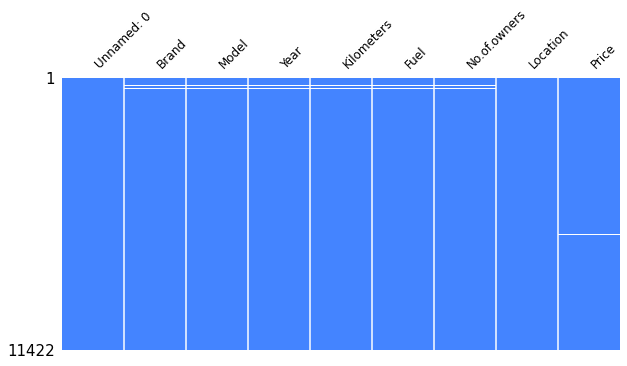

In [396]:
#Graphical Representation
#Heatmap
# Importing the libraries
import missingno as msno
# Visualize missing values as a matrix
msno.matrix(df,labels=True, sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

Observation


*   Here we see Missing values in column **brand,model,year,kilometers,fuel,no.of.owners,price**
*   So droping of missing values is required



### 3.2 Removing missing values

In [397]:
#Removing NaN values
df.dropna(axis="rows",inplace=True)
df

,Unnamed: 0,Brand,Model,Year,Kilometers,Fuel,No.of.owners,Location,Price
0,0,Nissan,Sunny,2017.0,86000.0,Diesel,1st,KOCHI,399999.0
1,1,Maruti Suzuki,Baleno,2018.0,51300.0,CNG & Hybrids,1st,RAJKOT,651000.0
3,3,Mahindra,Bolero Power Plus,2019.0,28400.0,Diesel,1st,BAREILLY,665000.0
4,4,Honda,Brio,2011.0,48000.0,Petrol,1st,DELHI,235000.0
5,5,Mahindra,XUV500,2016.0,95600.0,Diesel,1st,BAREILLY,650000.0
...,...,...,...,...,...,...,...,...,...
11417,9601,Audi,Q3,2017.0,44600.0,Petrol,1st,Gurgaon,2400000.0
11418,9602,Audi,A3,2017.0,34000.0,Diesel,1st,Gurgaon,2200000.0
11419,9603,Mercedes-Benz,E-Class Cabriolet,2016.0,33100.0,Petrol,2nd,Delhi,4475000.0
11420,9604,Audi,A4,2011.0,70000.0,Petrol,2nd,Delhi,900000.0


In [398]:
#rechecking for any NaN values
df.isnull().sum()

Unnamed: 0      0
Brand           0
Model           0
Year            0
Kilometers      0
Fuel            0
No.of.owners    0
Location        0
Price           0
dtype: int64

shape (11335, 9)


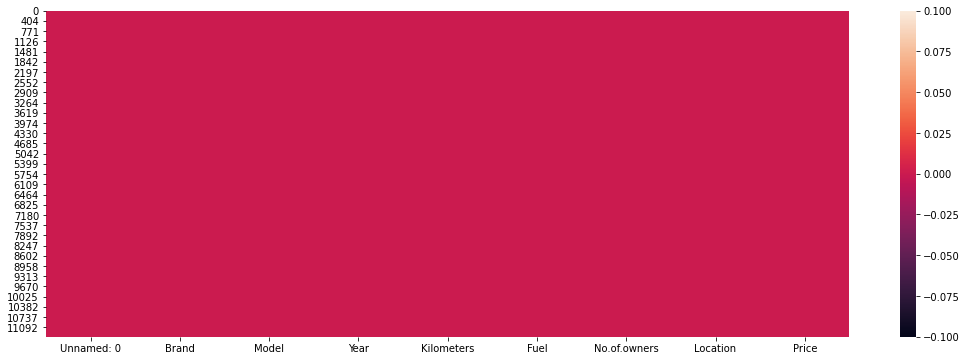

In [399]:
#Graphical Representation
#Heatmap
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull())
print("shape",df.shape)

**Observation**


*   All the missing values have been dropped out




### 3.3 Checking for any duplicates

In [400]:
df["Fuel"].value_counts()

Diesel           5915
Petrol           5316
CNG                71
CNG & Hybrids      15
CNG + Cng           7
Hybrid              4
LPG                 4
Petrol + Cng        2
LPG + Lpg           1
Name: Fuel, dtype: int64

In [401]:
#1st cheacking for any duplicate values in dataset
#dropping duplicate column,if exists
df= df.drop_duplicates()
print(df.head())
print(f'\nShape of dataframe:\n{df.shape}')

   Unnamed: 0          Brand  ...  Location     Price
0           0         Nissan  ...     KOCHI  399999.0
1           1  Maruti Suzuki  ...    RAJKOT  651000.0
3           3       Mahindra  ...  BAREILLY  665000.0
4           4          Honda  ...     DELHI  235000.0
5           5       Mahindra  ...  BAREILLY  650000.0

[5 rows x 9 columns]

Shape of dataframe:
(11335, 9)


**Observation**
*  No duplicate data is seen

### 3.4 Replacing misspelled words

In [402]:
 #Replacing misspelled and repeated words in column  fuel
df.replace(to_replace = ['CNG + Cng','CNG'], 
                                value='CNG',inplace=True)
df.replace(to_replace = ['LPG + Lpg','LPG'], 
                                value='LPG',inplace=True)
df.replace(to_replace = ['1st','1st '], 
                                value='1st',inplace=True)

df.replace(to_replace = ['2nd','2nd '], 
                                value='2nd',inplace=True)

df.replace(to_replace = ['4+','4 +'], 
                                value='4+',inplace=True)

 #Replacing misspelled and repeated words in column location
df.replace(to_replace = ['COIMBATORE','Coimbatore'], 
                                value='COIMBATORE',inplace=True)
df.replace(to_replace = ['CHENNAI','Chennai'], 
                                value='CHENNAI',inplace=True)
df.replace(to_replace = ['DELHI','Delhi'], 
                                value='DELHI',inplace=True)
df.replace(to_replace = ['NOIDA','Noida'], 
                                value='NOIDA',inplace=True)
df.replace(to_replace = ['AHMEDABAD','ahmedabad','Ahmedabad'], 
                                value='AHMEDABAD',inplace=True)
df.replace(to_replace = ['KANPUR','Kanpur'], 
                                value='KANPUR',inplace=True)
df.replace(to_replace = ['CHANDIGARH','Chandigarh'], 
                                value='CHANDIGARH',inplace=True)
df.replace(to_replace = ['GURGAON','gurgaon','Gurgaon'], 
                                value='GURGAON',inplace=True)
df.replace(to_replace = ['KANPUR','Kanpur'], 
                                value='KANPUR',inplace=True)
df.replace(to_replace = ['MUMBAI','Mumbai','Navi Mumbai'], 
                                value='MUMBAI',inplace=True)
df.replace(to_replace = ['LUCKNOW','Lucknow'], 
                                value='LUCKNOW',inplace=True)
df.replace(to_replace = ['AGRA','Agra'], 
                                value='AGRA',inplace=True)
df.replace(to_replace = ['FARIDABAD','Faridabad'], 
                                value='FARIDABAD',inplace=True)
df.replace(to_replace = ['GHAZIABAD','Ghaziabad'], 
                                value='GHAZIABAD',inplace=True)
df.replace(to_replace = ['THANE','Thane'], 
                                value='THANE',inplace=True)
df.replace(to_replace = ['HYDERABAD','Hyderabad'], 
                                value='AGRA',inplace=True)
df.replace(to_replace = ['KOLKATA','Kolkata'], 
                                value='FARIDABAD',inplace=True)
df.replace(to_replace = ['PUNE','Pune'], 
                                value='PUNE',inplace=True)
df.replace(to_replace = ['Bangalore'], 
                                value='BANGALORE',inplace=True)

### 3.5 Dropping columns which are not useful for our prediction

* Here we find that column Unnamed: 0 is not goona help much for our prediction
* so we drop the column **Unnamed: 0** here.

In [403]:
df.drop(['Unnamed: 0'], axis = 1,inplace=True)
df.head(5)

,Brand,Model,Year,Kilometers,Fuel,No.of.owners,Location,Price
0,Nissan,Sunny,2017.0,86000.0,Diesel,1st,KOCHI,399999.0
1,Maruti Suzuki,Baleno,2018.0,51300.0,CNG & Hybrids,1st,RAJKOT,651000.0
3,Mahindra,Bolero Power Plus,2019.0,28400.0,Diesel,1st,BAREILLY,665000.0
4,Honda,Brio,2011.0,48000.0,Petrol,1st,DELHI,235000.0
5,Mahindra,XUV500,2016.0,95600.0,Diesel,1st,BAREILLY,650000.0


### 3.6 Converting numeric values into integer values

In [404]:
df["Year"]=df['Year'].astype(int)
df["Kilometers"]=df['Kilometers'].astype(int)
df["Price"]=df['Price'].astype(int)

# 4.Exploratory Data Analysis

###4.1 Non-Graphical Univariate Analysis

In [405]:
#finding the unique values and value counts
#using for loop
for i in df.columns:
    print("unique values of",i,":",df[i].unique())
    print("\nvalue counts of",i,":",df[i].value_counts())
    print("**"*10)
    print("\n")

unique values of Brand : ['Nissan' 'Maruti Suzuki' 'Mahindra' 'Honda' 'Renault' 'Toyota' 'Hyundai'
 'Volkswagen' 'Ford' 'Jaguar' 'Skoda' 'Chevrolet' 'Tata' 'Mercedes-Benz'
 'Audi' 'Mini' 'Mahindra Renault' 'BMW' 'Datsun' 'Kia' 'Land Rover'
 'Mitsubishi' 'Bajaj' 'Ssangyong' 'Fiat' 'Volvo' 'Porsche' 'Isuzu' 'MG'
 'Maruti' 'Land' 'Jeep' 'MINI' 'Bentley' 'Mahindra-Renault' 'Lamborghini'
 'Lexus' 'Hindustan Motors']

value counts of Brand : Maruti Suzuki       2060
Hyundai             1810
Honda                988
Toyota               885
Mercedes-Benz        835
BMW                  651
Mahindra             529
Audi                 517
Volkswagen           514
Ford                 493
Renault              274
Maruti               259
Skoda                246
Land Rover           166
Tata                 160
Nissan               149
Jaguar                91
Porsche               86
MINI                  83
Kia                   82
Chevrolet             79
Volvo                 72
MG        

####**Obseravtion on non graphical univariate analysis**

* **brand**- Brand name Maruthi suzuki has been seen more for the sale.
* **model**- model name city of honda brand is high for sale with respect to model value count
* **year**- car with manufacturing year 2017 was found to be more in the dataset respect to model year count
* **fuel**- Diesel and petrol cars is found in almost equal numbers 
* **No.of.owners**- 1st owners cars have seen high in dataset 

###4.2 Graphical Univariate Analysis

**4.2.1 Univariate analysis- Target variable**

In [406]:
#description about column SalesPrice
df["Price"].describe()

count    1.133500e+04
mean     3.497560e+06
std      1.359257e+08
min      1.500000e+04
25%      4.349990e+05
50%      7.200000e+05
75%      1.525000e+06
max      9.000000e+09
Name: Price, dtype: float64

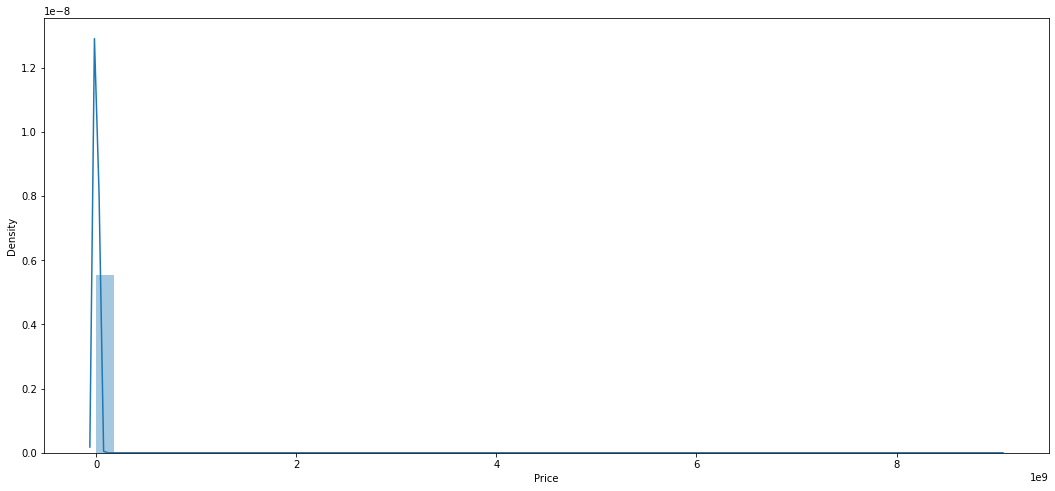

Skewness: 61.942996
Kurtosis: 3855.530615


In [407]:
#Let's visualize the distribution of sale price
plt.figure(figsize=(18, 8))
sns.distplot(df['Price'])
plt.show()
#skewness and kurtosis
print("Skewness: %f" % df['Price'].skew())
print("Kurtosis: %f" % df['Price'].kurt())


**4.2.2 Univariate analysis- Categorical Features**

**i) column Year**

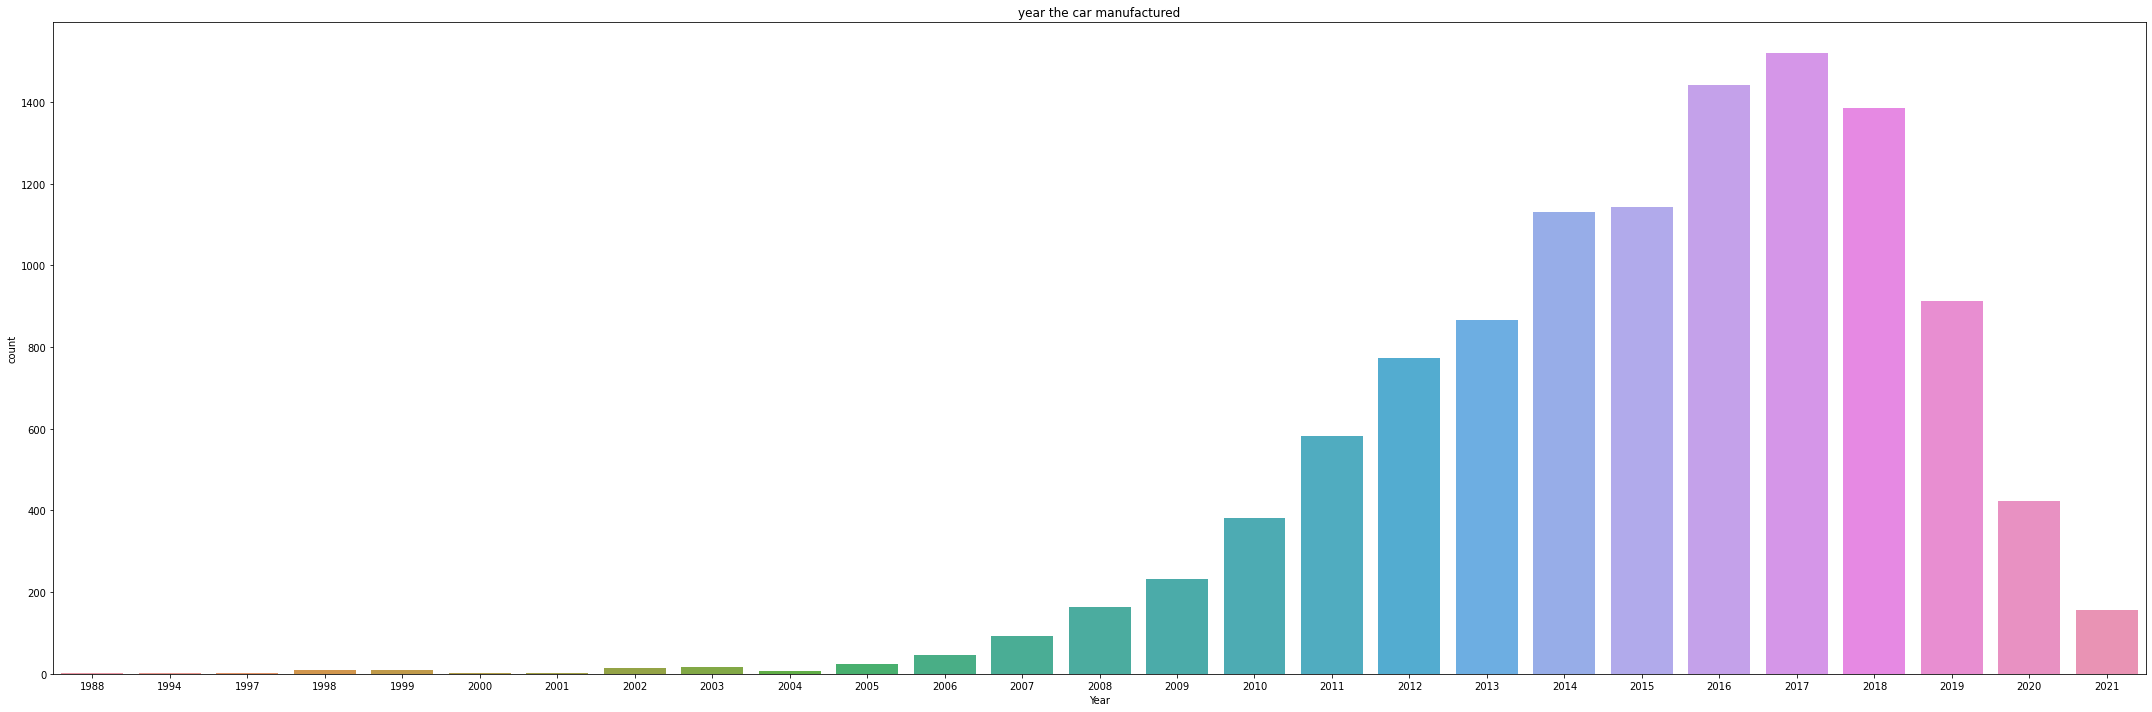

In [408]:
#countplot on column year
plt.figure(figsize=(30,10))
sns.countplot(df["Year"]).set_title("year the car manufactured")
plt.tight_layout()

**ii) column- Fuel**

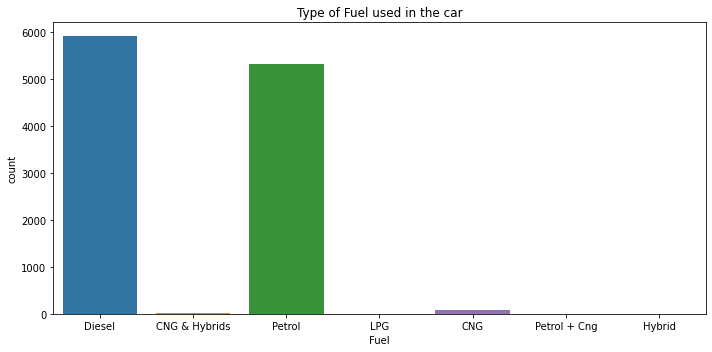

In [409]:
#countplot on column fuel
plt.figure(figsize=(10,5))
sns.countplot(df["Fuel"]).set_title("Type of Fuel used in the car")
plt.tight_layout()

**iii) column - Kilometers**

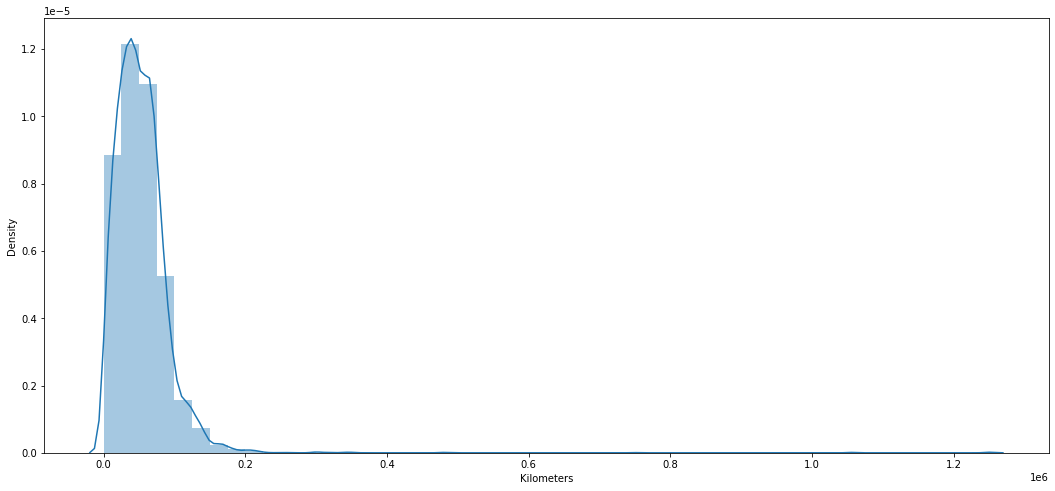

In [410]:
#Let's visualize the distribution of Kilometers
plt.figure(figsize=(18, 8))
sns.distplot(df['Kilometers'])
plt.show()


**iv) column - Brand**

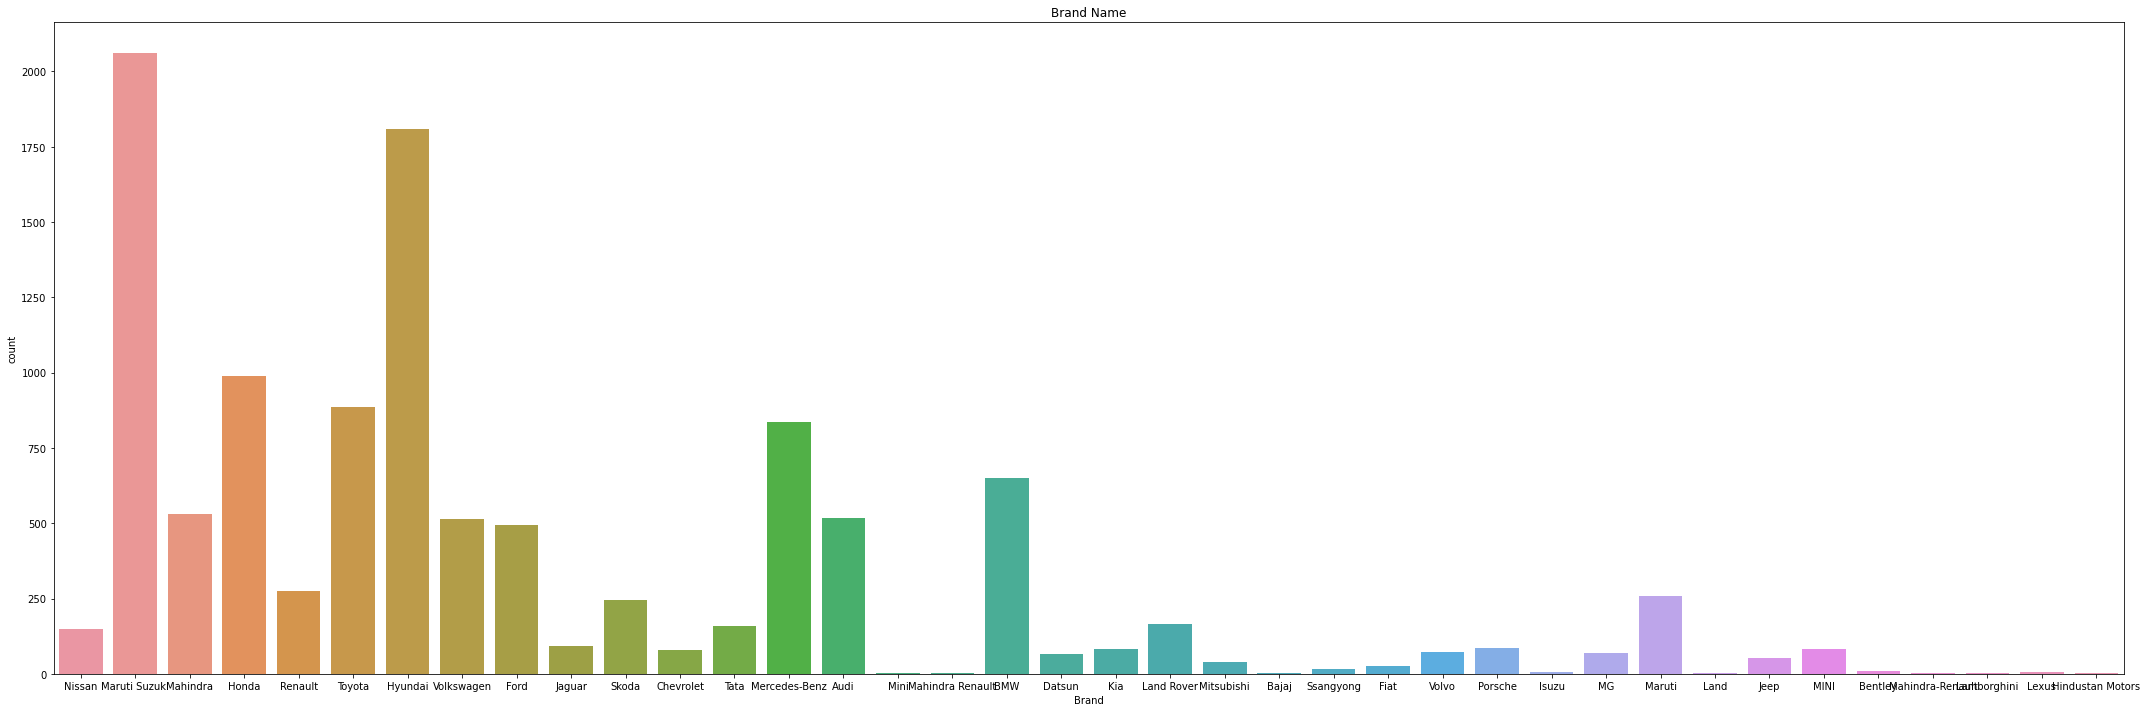

In [411]:
#countplot on column brand
plt.figure(figsize=(30,10))
sns.countplot(df["Brand"]).set_title("Brand Name")
plt.tight_layout()

**v) column - Location**

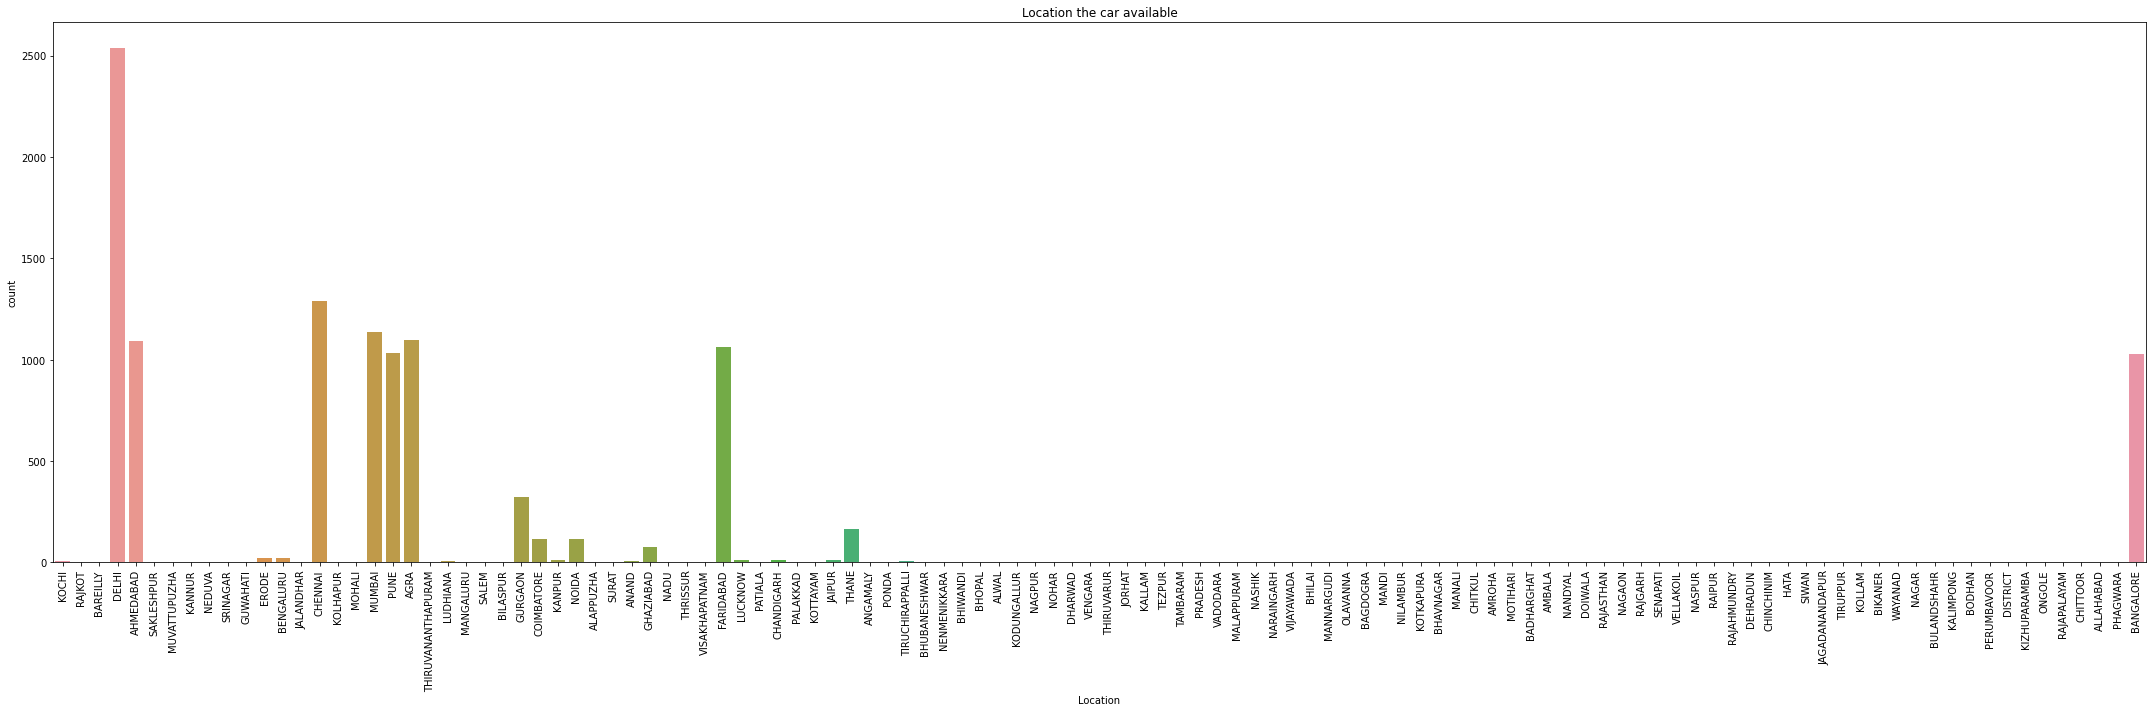

In [412]:
#countplot on column location
plt.figure(figsize=(30,10))
sns.countplot(df["Location"]).set_title("Location the car available")
plt.xticks(rotation='vertical')
plt.tight_layout()

**vi) column - Location**

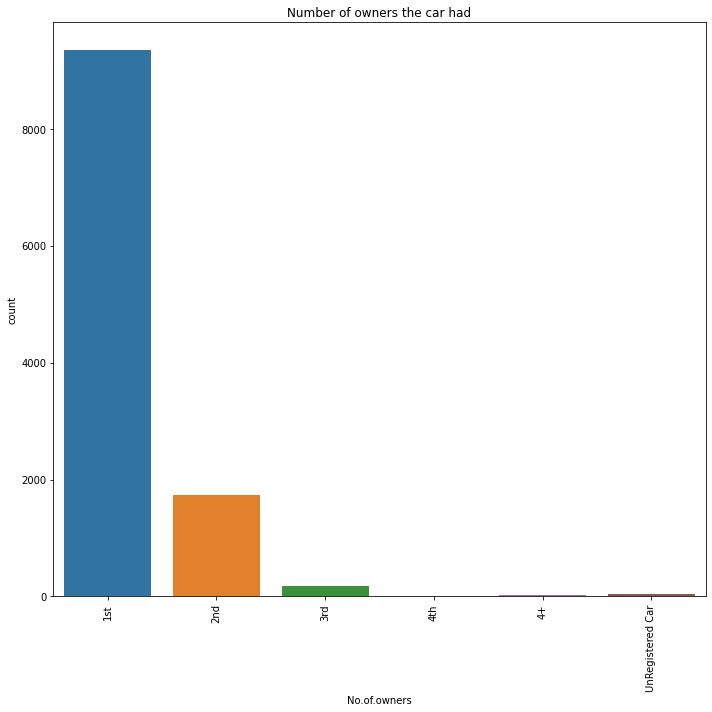

In [413]:
#countplot on column No.of.owners
plt.figure(figsize=(10,10))
sns.countplot(df["No.of.owners"]).set_title("Number of owners the car had")
plt.xticks(rotation='vertical')
plt.tight_layout()

####**Plot insight**

* **brand**- Brand name Maruthi suzuki has been seen more for the sale.
* **model**- model name city of honda brand is high for sale with respect to model value count
* **year**- car with manufacturing year 2017 was found to be more in the dataset respect to model year count
* **fuel**- Diesel and petrol cars is found in almost equal numbers 
* **No.of.owners**- 1st owners cars have seen high in dataset 

###4.3 Bivariate Analysis

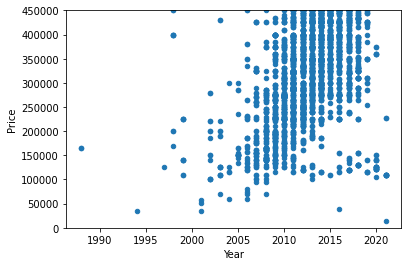

In [414]:
# Scatter plot Year / Price
attrib = 'Year'
data = pd.concat([df['Price'], df[attrib]], axis=1)
data.plot.scatter(x=attrib, y='Price', ylim=(0,450000));


#5. Featured Engineering

**i) Categorical encoding using Label-Encoder**

In [415]:
#From the given data-set we can infer that some of the data types are categorical
#we convert them to integer type by using the label encoder method
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Location'] = le.fit_transform(df['Location'])
df['No.of.owners'] = le.fit_transform(df['No.of.owners'])
df['Fuel'] = le.fit_transform(df['Fuel'])


In [416]:
#correlation
cor=df.corr()
cor

,Brand,Model,Year,Kilometers,Fuel,No.of.owners,Location,Price
Brand,1.000000,0.159387,0.013760,0.091195,-0.021614,-0.034612,-0.001644,-0.016859
Model,0.159387,1.000000,-0.059936,0.062438,-0.019613,-0.008908,-0.006479,-0.005056
Year,0.013760,-0.059936,1.000000,-0.414519,-0.052601,-0.225329,-0.028771,-0.035539
Kilometers,0.091195,0.062438,-0.414519,1.000000,-0.244782,0.095103,-0.035184,0.011767
Fuel,-0.021614,-0.019613,-0.052601,-0.244782,1.000000,0.017810,0.075807,0.015188
No.of.owners,-0.034612,-0.008908,-0.225329,0.095103,0.017810,1.000000,0.041603,0.036373
Location,-0.001644,-0.006479,-0.028771,-0.035184,0.075807,0.041603,1.000000,-0.003416
Price,-0.016859,-0.005056,-0.035539,0.011767,0.015188,0.036373,-0.003416,1.000000


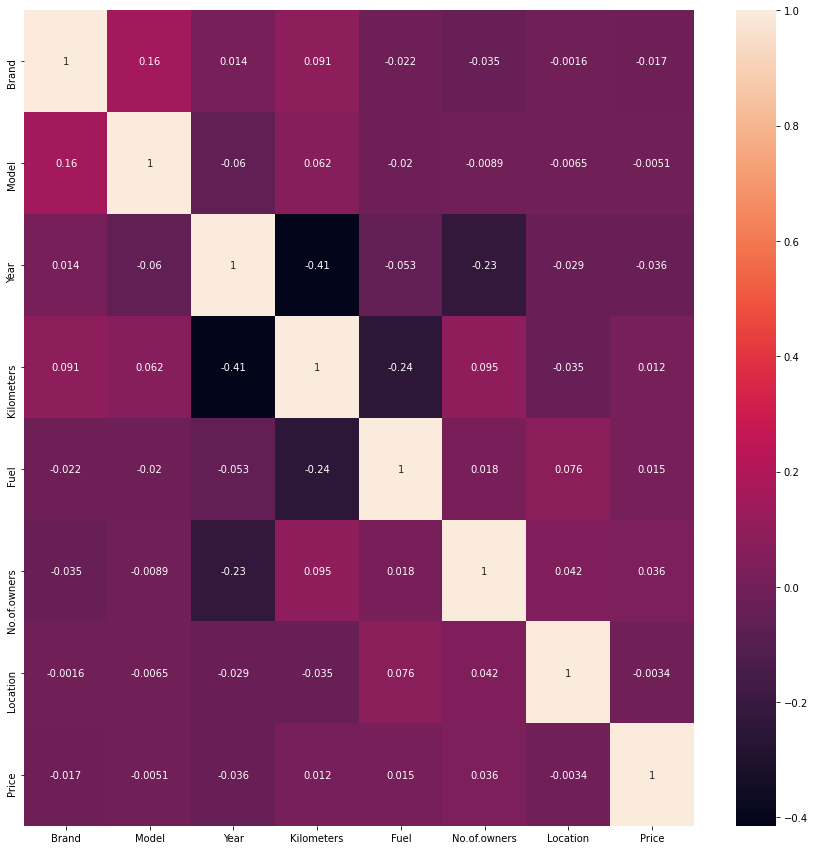

In [417]:
#Visualization of Correlation
#usind Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap((cor),annot=True)

Text(0.5, 1.0, 'correlation with Target Variable ')

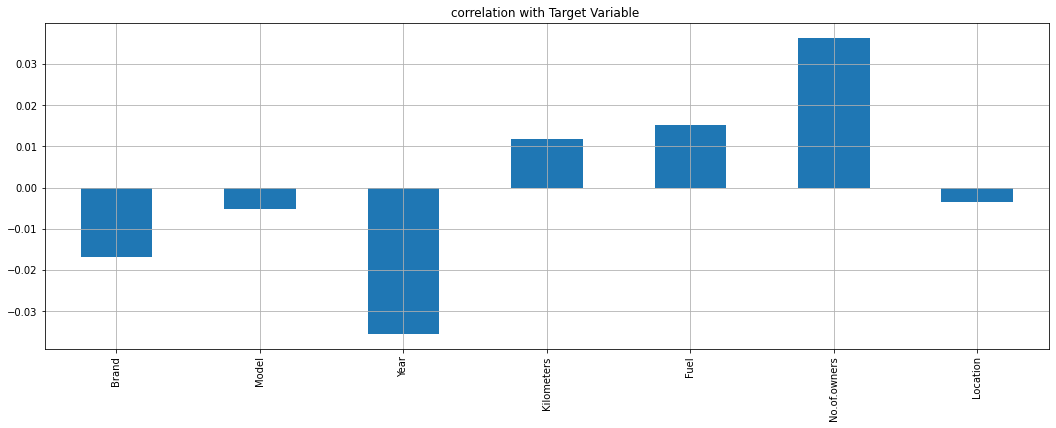

In [418]:
#correlation with Target
plt.figure(figsize=(18,6))
df.drop("Price",axis=1).corrwith(df["Price"]).plot(kind="bar",grid=True)
plt.xticks(rotation="vertical")
plt.title("correlation with Target Variable ")

**key points from heatmap**


*   columns which are positively correlated to our target Price are **No.of.owners,kilometers** 
*   columns which are Negatively correlated to our target Price are **Brand,Model,Location**
*   columns **Kilometers and year** are not correlated to each other much
   


#6. Data Cleaning

We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe () function below, which provides a statistical summary of all the quantitative variables.

In [419]:
df.describe()

,Brand,Model,Year,Kilometers,Fuel,No.of.owners,Location,Price
count,11335.000000,11335.000000,11335.000000,1.133500e+04,11335.000000,11335.000000,11335.000000,1.133500e+04
mean,18.892810,147.267049,2015.094486,5.289913e+04,3.393824,0.211734,33.198765,3.497560e+06
std,11.241524,91.790011,3.300248,4.177844e+04,1.520577,0.543489,27.213433,1.359257e+08
min,0.000000,0.000000,1988.000000,1.000000e+00,0.000000,0.000000,0.000000,1.500000e+04
25%,10.000000,64.000000,2013.000000,2.800000e+04,2.000000,0.000000,11.000000,4.349990e+05
50%,21.000000,138.000000,2016.000000,4.800000e+04,2.000000,0.000000,30.000000,7.200000e+05
75%,26.000000,242.000000,2018.000000,7.000000e+04,5.000000,0.000000,37.000000,1.525000e+06
max,37.000000,298.000000,2021.000000,1.250000e+06,6.000000,5.000000,113.000000,9.000000e+09


**key observation**

* There are no missing values

* Here we find that the mean is higher than median in most of the columns

If the mean is higher than the median, the distribution is positively skewed.

* the maximum and the 75% had a less range of difference than like it have to be in normal circumstances

* we infer that we may have few outliers and skewness in some of the attributes

## 6.1Finding Outliers

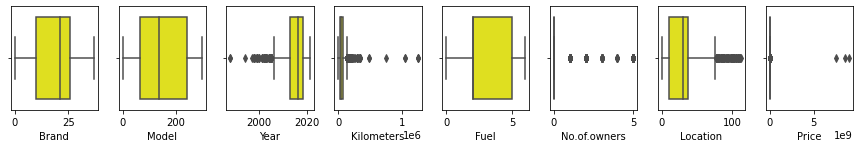

In [420]:
#Plotting Outliers
collist=df.columns.values
ncol=30
nrow=15
plt.figure(figsize=(3*nrow,ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="yellow",orient="v")
    plt.tight_layout()

##6.2 Treating Outliers

In [421]:
#Removing Outliers
#Z-score Techinique
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.89913393, 1.01031736, 0.57741055, ..., 0.3895993 , 0.58066661,
        0.02278964],
       [0.54329461, 1.19045491, 0.88043146, ..., 0.3895993 , 2.19758648,
        0.02094295],
       [0.18745528, 1.13598035, 1.18345236, ..., 0.3895993 , 0.779016  ,
        0.02083995],
       ...,
       [0.63225444, 0.70018386, 0.27438964, ..., 1.45044573, 0.11754878,
        0.0071913 ],
       [1.68070119, 1.41924807, 1.24071489, ..., 1.45044573, 0.11754878,
        0.01911099],
       [0.63225444, 0.72704965, 0.63467308, ..., 0.3895993 , 0.11754878,
        0.00476428]])

In [422]:
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]

(array([   18,    18,    36,    39,    43,    53,    88,    92,    93,
         110,   110,   135,   136,   143,   155,   160,   174,   175,
         177,   194,   217,   235,   245,   272,   274,   276,   276,
         291,   306,   307,   311,   335,   335,   336,   363,   372,
         380,   383,   385,   392,   407,   411,   411,   411,   432,
         432,   434,   435,   446,   474,   497,   505,   549,   549,
         646,   649,   659,   680,   766,   822,   833,   877,   888,
         894,   913,   919,   919,   921,   922,   929,   942,   946,
         951,   965,   970,   975,   992,  1001,  1014,  1017,  1022,
        1023,  1031,  1031,  1064,  1068,  1069,  1077,  1077,  1110,
        1118,  1121,  1122,  1122,  1129,  1152,  1179,  1234,  1242,
        1294,  1329,  1340,  1346,  1358,  1365,  1378,  1387,  1418,
        1418,  1434,  1437,  1491,  1491,  1492,  1497,  1503,  1509,
        1528,  1531,  1587,  1591,  1623,  1663,  1755,  1756,  1756,
        1757,  1758

In [423]:
print(df_new.shape)
print(df.shape)

(10955, 8)
(11335, 8)


In [424]:
## Percentage Loss
loss_of_data=(11335-10955)/11335*100
loss_of_data

3.3524481693868546

**Outliers Overview**
* The loss of data is only 4% which can be acceptable. 

* so proceeding with outlier removal data

## 7. Seperating target variable

In [425]:
#seperating SalePrice from other attributes
x_l=df_new.drop(["Price"],axis=1)
y=df_new["Price"]

### 7.1 Scaling Input Variable

In [426]:
# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x

array([[ 0.90396984,  1.00760722,  0.57386917, ..., -0.91219502,
        -0.42529688,  0.58555089],
       [ 0.54711499, -1.19270115,  0.90459339, ..., -1.56976536,
        -0.42529688,  2.20397816],
       [ 0.19026015, -1.13823807,  1.23531761, ..., -0.91219502,
        -0.42529688, -0.77539931],
       ...,
       [ 0.6363287 , -0.70253344,  0.24314495, ...,  1.060516  ,
         2.35129868, -0.11331543],
       [-1.68322778, -1.42144607, -1.41047617, ...,  1.060516  ,
         2.35129868, -0.11331543],
       [ 0.6363287 ,  0.72439921, -0.74902772, ...,  1.060516  ,
        -0.42529688, -0.11331543]])

Once the standard scaling is done we proceed with train and test split

#8. Preparing dataset for model training

8.1 splitting the testing and training data

In [427]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [428]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8764, 7), (2191, 7), (8764,), (2191,))

# 9. Finding best model

In [429]:
#importing our model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
lr=LinearRegression()
ls=Lasso()
rd=Ridge()
en=ElasticNet()
from sklearn.svm import SVR
svr=SVR()
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
#importing error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [430]:
#scoring the model
model=[lr,svr,knn,ls,rd,en]
for m in model:
    m.fit(x_train,y_train)
    print("Training score of ",m,"is",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Metrics:")
    print("mean_absolute_error is :",mean_absolute_error(y_test,predm))
    print("mean_squared_error is :",mean_squared_error(y_test,predm))
    print("root mean_absolute_error is :",np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score is :",r2_score(y_test,predm))
    
    print("**********************************************************")
    print("\n\n")

Training score of  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is 0.19282355533345208
Metrics:
mean_absolute_error is : 864633.2405830605
mean_squared_error is : 1661938533736.2537
root mean_absolute_error is : 1289161.9501584172
r2_score is : 0.19246664687241444
**********************************************************



Training score of  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is -0.15183814526096473
Metrics:
mean_absolute_error is : 852664.1216485171
mean_squared_error is : 2387939430733.173
root mean_absolute_error is : 1545295.903939816
r2_score is : -0.16029606175047673
**********************************************************



Training score of  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') is 0

# Algorithms requires all features to be on common scale. 
#using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x_l)
x

In [431]:
#using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
print("score is",rf.score(x_train,y_train))
print("mean absolute error is : ",mean_absolute_error(y_test,rf_pred))
print("mean squared error is : ",mean_squared_error(y_test,rf_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,rf_pred)))
print("r2 score is",r2_score(y_test,rf_pred))


score is 0.9948516149595651
mean absolute error is :  74379.39062248406
mean squared error is :  45270543234.10349
root mean absolute error is :  272.72585250115924
r2 score is 0.9780031133320214


In [432]:
#using AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
rf=RandomForestRegressor()
ada=AdaBoostRegressor(base_estimator=rf,n_estimators=20,learning_rate=0.1,random_state=1)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("score is",ada_score)
print("R2 score : %.2f" % r2_score(y_test,ada_pred))
print("mean absolute error is : ",mean_absolute_error(y_test,ada_pred))
print("mean squared error is : ",mean_squared_error(y_test,ada_pred))
print("root mean absolute error is : ",np.sqrt(mean_absolute_error(y_test,ada_pred)))


score is 0.9987338721092694
R2 score : 0.98
mean absolute error is :  64796.03207201648
mean squared error is :  32533762097.716305
root mean absolute error is :  254.5506473612206


In [433]:
#AdaBoostRegressor
#using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
parameters={"n_estimators" :[1,10,100],
            "learning_rate" : [0.15,0.1,0.05,0.01],
            "loss" : ['linear', 'square', 'exponential']}
ada=AdaBoostRegressor()
clf=GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.15, 'loss': 'square', 'n_estimators': 10}


In [434]:
from sklearn.ensemble import AdaBoostRegressor
rf=RandomForestRegressor()
ada=AdaBoostRegressor(base_estimator=rf,n_estimators=10,learning_rate=0.15,random_state=1,loss="square")
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_score=ada.score(x_train,y_train)
print("final training score is",ada_score*100)
print("final testing is",r2_score(y_test,ada_pred)*100)

final training score is 99.65381645184334
final testing is 98.25795840154399


In [435]:
#cross validating 
#Random forest classifier
#cross-validating for checking upper/lower cutting
from sklearn.model_selection import cross_val_score
ada.fit(x_train,y_train)
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)
accuracy=r2_score(y_test,pred_test)
for i in range(10,20):
    cr=cross_val_score(rf,x,y,cv=i)
    cross=cr.mean()
    print("At cv : ",i,"\ncross val score is : ",cross*100,"\nr2_score is: ",accuracy*100)
    print("******************************************************************************")
    print("\n\n")

At cv :  10 
cross val score is :  96.30484414213385 
r2_score is:  98.25795840154399
******************************************************************************



At cv :  11 
cross val score is :  96.44123970428609 
r2_score is:  98.25795840154399
******************************************************************************



At cv :  12 
cross val score is :  96.32765726690835 
r2_score is:  98.25795840154399
******************************************************************************



At cv :  13 
cross val score is :  96.3531930936269 
r2_score is:  98.25795840154399
******************************************************************************



At cv :  14 
cross val score is :  96.22138024670338 
r2_score is:  98.25795840154399
******************************************************************************



At cv :  15 
cross val score is :  96.66051460132944 
r2_score is:  98.25795840154399
***************************************************************************

Text(0, 0.5, 'ada_pred')

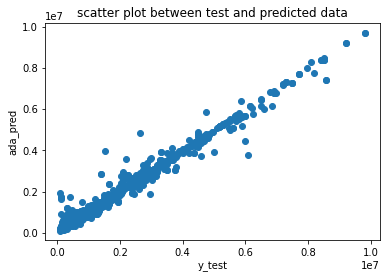

In [436]:
#plotting scatter plot between training and predicted data for adaboost Regression
plt.scatter(y_test,ada_pred)
plt.title("scatter plot between test and predicted data")
plt.xlabel("y_test")
plt.ylabel("ada_pred")

In [437]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ada.predict(x_test))
df_con=pd.DataFrame({"original":a,"Predicted":predicted})
df_con.head(10)

,original,Predicted
0,575000,5.786500e+05
1,650000,5.488000e+05
2,325000,3.360200e+05
3,725000,7.312500e+05
4,650000,6.237200e+05
5,349000,4.887700e+05
6,459999,4.438592e+05
7,1450000,1.475130e+06
8,275000,2.800000e+05
9,260000,2.631000e+05


#Conclusion
* We have managed out how to prepare a model that gives users for a best approach with take a gander at future car price predictions.
* A few relapse strategies have been investigated Furthermore compared, when arriving during a prediction strategy In light of AdaBoost support.
* Straight former imply works bring been utilized within our model, something like that that future value predictions will have a tendency towards All the more sensible values.
* We concocted an approach with use similarly as considerably information as time permits for our prediction system, by adopting those ideas from claiming gradient boosting.